### 경쟁적 전염

[백준 링크](https://www.acmicpc.net/problem/18405) []

+ N x N 크기의 시험관
+ 시험관은 1x1 크기의 칸으로 나누어지며, 특정한 위치에는 바이러스 존재 가능
+ 바이러스 종류는 1~K번으로 K가지가 있으며 모든 바이러스는 이 중 하나에 속함
<br>

+ 시험관에 존재하는 모든 바이러스는 1초마다 상하좌우의 방향으로 증식하는데, 매초 번호가 낮은 종류의 바이러스부터 증식
+ 또한 증식 과정에서 특정한 칸에 이미 어떠한 바이러스가 있다면, 그곳에는 다른 바이러스가 들어갈 수 없음
<br>

+ 시험관의 크기와 바이러스의 위치 정보가 주어졌을 때, S초가 지난 후에 (X,Y)에 존재하는 바이러스의 종류를 출력하는 프로그램 작성하기
<br>

+ 만약 S초가 지난 후에 해당 위치에 바이러스가 존재하지 않는다면, 0을 출력
+ 이 때, X와 Y는 각각 행과 열의 위치를 의미하며, 시험관의 가장 왼쪽 위에 해당하는 곳은 (1,1)에 해당함

**예시**  
+ 3x3 크기의 시험관에 서로 다른 1,2,3번 바이러스가 각각 (1,1), (1,3), (3,1)에 위치해 있을 때   
  2초가 지난 뒤 (3,2)에 존재하는 바이러스의 종류를 계산  
  
  1 2       1 1 2        1 1 2  
        =>  1 2    =>  1 1 2  
  3       3 3         3 3 2  

+ 결과적으로 2초가 지난 뒤에 (3,2)에 존재하는 바이러스의 종류는 3번 바이러스이므로 3 출력

**입력 조건**  
+ 첫째 줄에 자연수 N, K가 주어지며, 각 자연수는 공백으로 구분함(1 <= N <= 200, 1 <= K <= 1,000)
+ 둘째 줄부터 N개의 줄에 걸쳐서 시험관의 정보가 주어짐  
  각 행은 N개의 원소로 구성되며, 해당 위치에 존재하는 바이러스의 번호가 주어지며 공백으로 구분  
  단, 해당 위치에 바이러스가 존재하지 않는 경우 0이 주어짐  
  또한 모든 바이러스의 번호는 K 이하의 자연수로만 주어짐  
+ N+2번째 줄에는 S, X, Y가 주어지며 공백으로 구분 (0 <= S <= 10,000, 1 <= X,Y <= N)

**출력 조건**  
+ S초 뒤에 (X,Y)에 존재하는 바이러스의 종류를 출력
+ 만약 S초 뒤에 해당 위치에 바이러스가 존재하지 않는다면, 0을 출력

**입력 예시1**  
3 3  
1 0 2  
0 0 0  
3 0 0  
2 3 2  

**출력 예시1**  
3  

**입력 예시2**  
3 3  
1 0 2  
0 0 0  
3 0 0  
1 2 2  

**출력 예시2**  
0  

In [7]:
from collections import deque

n, k = map(int, input().split())

graph = []
data = []

for i in range(n):
    graph.append(list(map(int, input().split())))
    for j in range(n):
        if graph[i][j] != 0:
            data.append((graph[i][j], 0, i, j))

data.sort()
q = deque(data)

target_s, target_x, target_y = map(int, input().split())

dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

while q:
    virus, s, x, y = q.popleft()
    if s == target_s:
        break
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx and nx < n and 0 <= ny and ny < n:
            if graph[nx][ny] == 0:
                graph[nx][ny] = virus
                q.append((virus, s+1, nx, ny))
                
print(graph[target_x-1][target_y-1])

3 3
1 0 2
0 0 0
3 0 0
2 3 2
3


In [8]:
from collections import deque

n, k = map(int, input().split())

graph = []
data = []

for i in range(n):
    graph.append(list(map(int, input().split())))
    for j in range(n):
        if graph[i][j] != 0:
            data.append((graph[i][j], 0, i, j))

data.sort()
q = deque(data)

target_s, target_x, target_y = map(int, input().split())

dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

while q:
    virus, s, x, y = q.popleft()
    if s == target_s:
        break
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx and nx < n and 0 <= ny and ny < n:
            if graph[nx][ny] == 0:
                graph[nx][ny] = virus
                q.append((virus, s+1, nx, ny))
                
print(graph[target_x-1][target_y-1])

3 3
1 0 2
0 0 0
3 0 0
1 2 2
0


In [ ]:
from collections import deque

n, k = map(int, input().split()) 

graph = []  # 맵 정보
data = []   # 바이러스 정보

# 맵 정보를 입력받고 초기 바이러스의 위치를 저장
for i in range(n):
    graph.append(list(map(int, input().split())))
    for j in range(n):
        if graph[i][j] != 0:  # 만약 바이러스가 있는 위치라면
            data.append((graph[i][j], 0, i, j))  # 바이러스의 종류, 시간, x좌표, y좌표 저장

data.sort()  # 초기 바이러스 정보를 시간순으로 정렬
q = deque(data)  # 바이러스 정보를 큐에 저장

target_s, target_x, target_y = map(int, input().split())  # 목표 시간과 위치

dx = [-1, 0, 1, 0] 
dy = [0, 1, 0, -1]

while q:
    virus, s, x, y = q.popleft()  # 큐에서 바이러스 정보를 꺼내서
    if s == target_s:  # 목표 시간에 도달했으면 종료
        break
    for i in range(4):  # 상하좌우로 이동하면서 바이러스를 퍼뜨림
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx and nx < n and 0 <= ny and ny < n:  # 맵의 범위 내에서
            if graph[nx][ny] == 0:  # 빈 공간이면
                graph[nx][ny] = virus  # 바이러스를 퍼뜨림
                q.append((virus, s+1, nx, ny))  # 다음 시간과 위치를 큐에 추가
                
print(graph[target_x-1][target_y-1])  # 목표 위치의 바이러스 종류를 출력

In [1]:
from collections import deque

n, k = map(int, input().split()) 

graph = []  # 맵 정보
data = []   # 바이러스 정보

# 맵 정보를 입력받고 초기 바이러스의 위치를 저장
for i in range(n):
    graph.append(list(map(int, input().split())))
    for j in range(n):
        if graph[i][j] != 0:  # 만약 바이러스가 있는 위치라면
            data.append((graph[i][j], 0, i, j))  # 바이러스의 종류, 시간, x좌표, y좌표 저장

3 3
1 0 2
0 0 0
3 0 0


In [2]:
graph

[[1, 0, 2], [0, 0, 0], [3, 0, 0]]

In [3]:
data # 0초에 1번 바이러스 (0,0) / 2번 바이러스 (0,2) / 3번 바이러스 (2,0)

[(1, 0, 0, 0), (2, 0, 0, 2), (3, 0, 2, 0)]

In [4]:
data.sort()  # 초기 바이러스 정보를 시간순으로 정렬
data

[(1, 0, 0, 0), (2, 0, 0, 2), (3, 0, 2, 0)]

In [5]:
q = deque(data)  # 바이러스 정보를 큐에 저장
q

deque([(1, 0, 0, 0), (2, 0, 0, 2), (3, 0, 2, 0)])

In [6]:
target_s, target_x, target_y = map(int, input().split())  # 목표 시간과 위치

dx = [-1, 0, 1, 0] 
dy = [0, 1, 0, -1]

2 3 2


In [7]:
while q:
    virus, s, x, y = q.popleft()  # 큐에서 바이러스 정보를 꺼내서
    if s == target_s:  # 목표 시간에 도달했으면 종료
        break
    for i in range(4):  # 상하좌우로 이동하면서 바이러스를 퍼뜨림
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx and nx < n and 0 <= ny and ny < n:  # 맵의 범위 내에서
            if graph[nx][ny] == 0:  # 빈 공간이면
                graph[nx][ny] = virus  # 바이러스를 퍼뜨림
                q.append((virus, s+1, nx, ny))  # 다음 시간과 위치를 큐에 추가

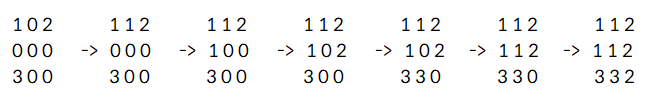